In [223]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import imp
sys.path.append('../../../src/porbnet/')
import networks
import util_porbnet as util

In [224]:
# data
x = torch.tensor([.25, .75]).reshape(-1,1)
y = torch.tensor([-.5, .5]).reshape(-1,1)

x_predict = torch.linspace(0,1,100).reshape(-1,1)

In [225]:
imp.reload(networks)
intensity = util.Piecewise(np.array([0,1]),np.array([33.0]), .25)

net = networks.RBFN(dim_in=1, dim_hidden_initial=50, dim_hidden_max=75, \
                    dim_out=1, intensity=intensity, s2_0=1.0, \
                    prior_w_sig2 = .10, prior_b_sig2 = .10, sig2 = .01)

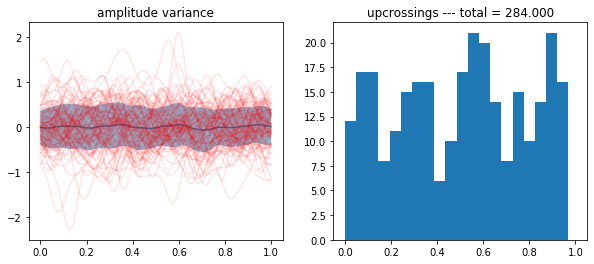

In [226]:
# prior
x_plot = torch.linspace(0, 1, 100).reshape(-1,1)

y_samp_prior = net.sample_functions_prior(x_plot, n_samp=100)
fig, ax = util.plot_prior_predictive(x_plot.numpy().reshape(-1), y_samp_prior.detach().numpy(), plot_all_functions=True)

In [227]:
net.train(x, y, n_samp=100, frac_samp_resize=.5, numpy=False, n_print=10)

Epsilon adapted from 0.000010 to 0.000015 based on acceptance of 1.000
sample [5/50], acceptance_hmc: 1.000, acceptance_birth: nan, acceptance_death: nan
Epsilon adapted from 0.000015 to 0.000023 based on acceptance of 1.000
sample [10/50], acceptance_hmc: 1.000, acceptance_birth: nan, acceptance_death: nan
Epsilon adapted from 0.000023 to 0.000034 based on acceptance of 1.000
sample [15/50], acceptance_hmc: 1.000, acceptance_birth: nan, acceptance_death: nan
Epsilon adapted from 0.000034 to 0.000052 based on acceptance of 1.000
sample [20/50], acceptance_hmc: 1.000, acceptance_birth: nan, acceptance_death: nan
Epsilon adapted from 0.000052 to 0.000078 based on acceptance of 1.000
sample [25/50], acceptance_hmc: 1.000, acceptance_birth: nan, acceptance_death: nan
Epsilon adapted from 0.000078 to 0.000062 based on acceptance of 0.400
sample [30/50], acceptance_hmc: 0.900, acceptance_birth: nan, acceptance_death: nan
Epsilon adapted from 0.000062 to 0.000093 based on acceptance of 1.000


In [228]:
mean, std = net.predict(x_predict, x, y, numpy=False, n_samp=10)

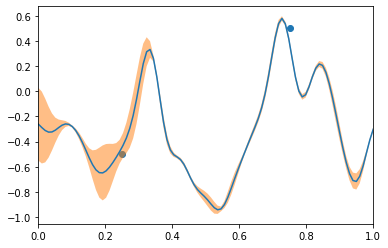

In [229]:
fig, ax = plt.subplots()
ax.scatter(x.numpy(),y.numpy())
ax.set_xlim(0,1)
ax.plot(x_predict.numpy(), mean.numpy())
ax.fill_between(x_predict.numpy().reshape(-1),
                mean.numpy() - std.numpy(),
                mean.numpy() + std.numpy(), alpha = .5)